In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACC', 'ADSK','AMD', 'AMZN', 'ANET', 'APPH',
    'AXON', 'BBY','BROS', 'BYND', 'CDNS', 'COIN', 'COUR', 'CRWD', 
    'DDOG', 'DKNG', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FTCH', 'FUV', 
    'FVRR', 'GH', 'GMED', 'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU',
    'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA', 'NYT',
    'OKTA', 'OPEN', 'PANW', 'PINS', 'PTON', 'PUBM', 'QDEL', 'RBLX',
    'RDFN', 'RGEN', 'ROKU', 'ROST', 'SE', 'SHOP', 'SPGI', 'SPLK', 'SQ',
    'TASK', 'TDOC','TEAM', 'TREX', 'TRUP', 'TSLA', 'TTD', 'TTWO', 
    'TWLO', 'TWTR', 'UPST', 'VEEV', 'WDAY', 'WK', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

75

In [3]:
N_YEARS = 5
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = str(TODAY - timedelta(N_DAYS))
START, TODAY

('2016-12-15', datetime.date(2021, 12, 15))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  78 of 78 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ACC
   ...ADSK
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BBY
   ...BROS
   ...BYND
   ...CDNS
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FTCH
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...PUBM
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...ROST
   ...SE
   ...SHOP
   ...SPGI
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TRUP
   ...TSLA
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WDAY
   ...WK
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [36]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
spx = spx / spx[1]
spx

1       1.000000
2       1.003732
3       1.005398
4       0.999292
5       0.999887
          ...   
1252    1.022497
1253    1.004844
1254    0.994560
1255    1.011320
1256    0.992602
Name: ^GSPC, Length: 1256, dtype: float64

In [44]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.003740
2,1.005152
3,1.014611
4,1.000706
5,0.998626
...,...
1252,1.057959
1253,1.029953
1254,0.983229
1255,1.001615


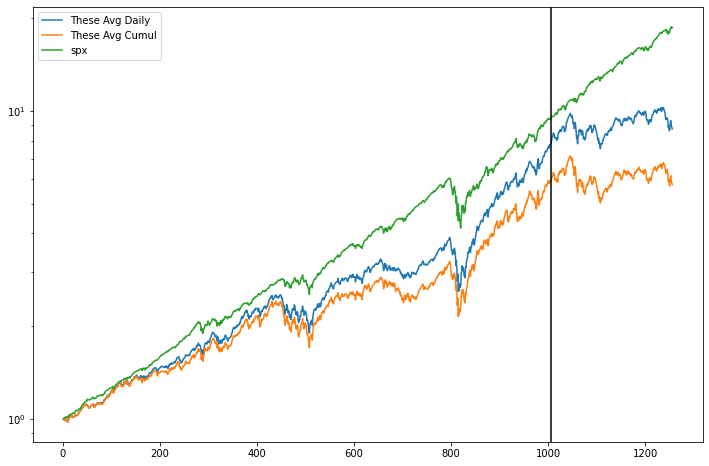

In [59]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

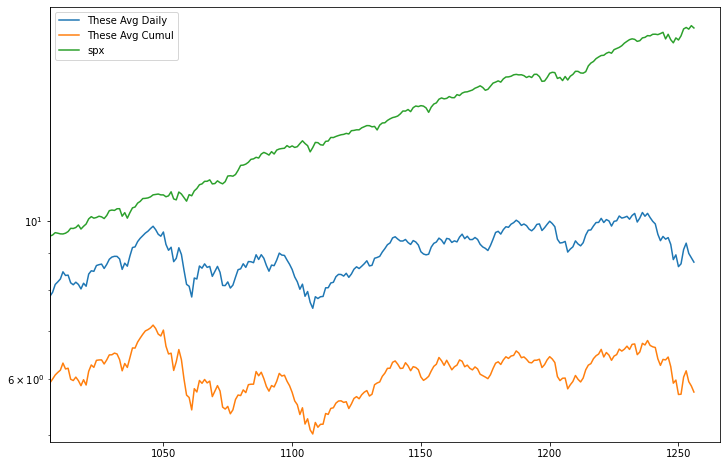

In [71]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim([10 ** 0.69, 10 ** 1.3])
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [5]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [6]:
rblx = get_stock_data('RBLX', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1063,69.500000,69.500000,74.830002,60.500000,64.500000,4.241327,1.077519,NaN,NaN
1064,73.900002,73.900002,77.779999,70.129997,74.930000,4.302713,0.986254,1.063309,1.078130
1065,69.699997,69.699997,72.959999,69.110001,72.470001,4.244200,0.961777,0.943166,0.980650
1066,72.150002,72.150002,74.059998,66.250000,70.019997,4.278747,1.030420,1.035151,1.004591
1067,77.000000,77.000000,78.000000,73.180000,73.730003,4.343805,1.044351,1.067221,1.021899


In [7]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1063,69.500000,69.500000,74.830002,60.500000
1064,73.900002,73.900002,77.779999,70.129997
1065,69.699997,69.699997,72.959999,69.110001
1066,72.150002,72.150002,74.059998,66.250000
1067,77.000000,77.000000,78.000000,73.180000


In [8]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1063,69.500000,69.500000,74.830002,60.500000,77.779999,70.129997,1.119137,1.009065
1064,73.900002,73.900002,77.779999,70.129997,72.959999,69.110001,0.987280,0.935183
1065,69.699997,69.699997,72.959999,69.110001,74.059998,66.250000,1.062554,0.950502
1066,72.150002,72.150002,74.059998,66.250000,78.000000,73.180000,1.081081,1.014276
1067,77.000000,77.000000,78.000000,73.180000,79.099998,74.889999,1.027273,0.972597


0.05    0.99138
Name: HighMult, dtype: float64


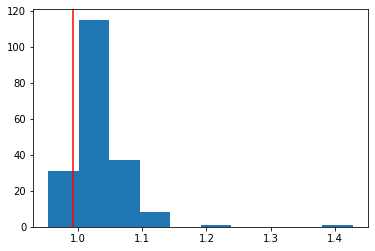

In [9]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0111984223195023


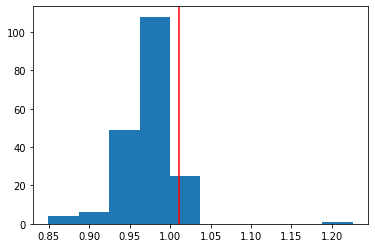

In [10]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [11]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [12]:
get_hilo_mult(rblx)

(1.0111984223195023, 0.9913800578508853)

In [13]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0094942974905672, 0.9934605583190288)

In [14]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [15]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1063,69.500000,69.500000,74.830002,60.500000,77.779999,70.129997,1.119137,1.009065,0
1064,73.900002,73.900002,77.779999,70.129997,72.959999,69.110001,0.987280,0.935183,1
1065,69.699997,69.699997,72.959999,69.110001,74.059998,66.250000,1.062554,0.950502,0
1066,72.150002,72.150002,74.059998,66.250000,78.000000,73.180000,1.081081,1.014276,1
1067,77.000000,77.000000,78.000000,73.180000,79.099998,74.889999,1.027273,0.972597,1


In [16]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [17]:
get_hilo_mults(rblx)

(1.0069286473861248,
 0.9880713979523865,
 1.0120644423284273,
 0.9928738094498384)

In [18]:
get_hilo_mults(aapl)

(1.0081187125935371, 0.9961895780063451, 1.010795011456968, 0.9891514076789153)

In [19]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.008119,0.996190,1.010795,0.989151
1,ABMD,1.004627,0.997318,1.005962,0.997267
2,ABNB,1.005371,0.994804,1.011410,0.988151
3,ACC,1.002948,0.996985,1.003058,0.997605
4,ADSK,1.005121,0.997148,1.008571,0.992706


In [20]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv